<a href="https://colab.research.google.com/github/Makkala-Kumar/COD-Internship-Tasks/blob/main/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4: SOCIAL MEDIA SENTIMENT ANALYSIS
Analyze social media data (e.g., Twitter) to understand public sentiment
towards specific topics, products, or events. Use natural language
processing (NLP) techniques to preprocess text data, extract sentiment
scores, and visualize sentiment trends over time.

# Dataset Information
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, let's say a tweet contains hate speech if it has a racist or sexist or too much improper sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, my objective is to predict the labels on the test dataset.

For training the models, i have provided a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet. Data is provided in a CSV format, sourced from github repository.

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [116]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# Read CSV file
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Twitter_Sentiments.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing

In [119]:
#remove pattern in input text
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word, "", input_txt)
  return input_txt

In [120]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [121]:
# reomve twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]")

In [122]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can't use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [123]:
#remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub("[^a-zA-Z#]", " ", x))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can t use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [124]:
#remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [125]:
#individual words considered as tokens
token_tweet = df['clean_tweet'].apply(lambda x: x.split())
token_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [126]:
#stem the words or narrow down similar words to a single word
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

token_tweet = token_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
token_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [127]:
#combine the above words into single sentence
for i in range(len(token_tweet)):
  token_tweet[i] = " ".join(token_tweet[i])

df['clean_tweet'] = token_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# EDA on the above data and gaining insights through visualization and extracting data

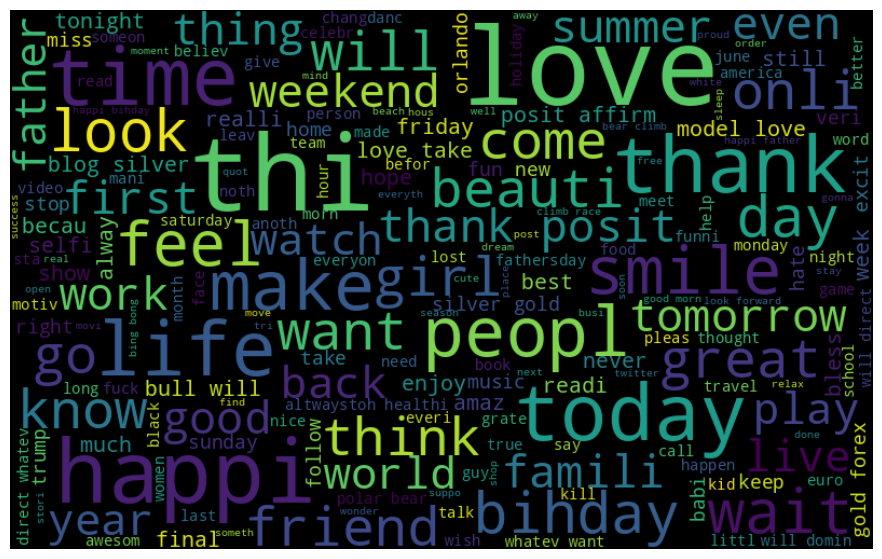

In [128]:
#visualization of the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(16,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

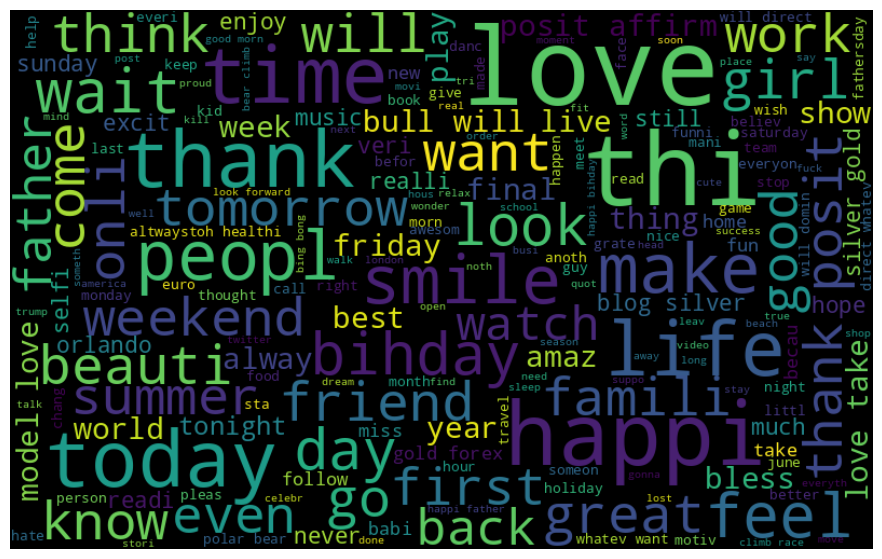

In [129]:
#visualization for positive words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

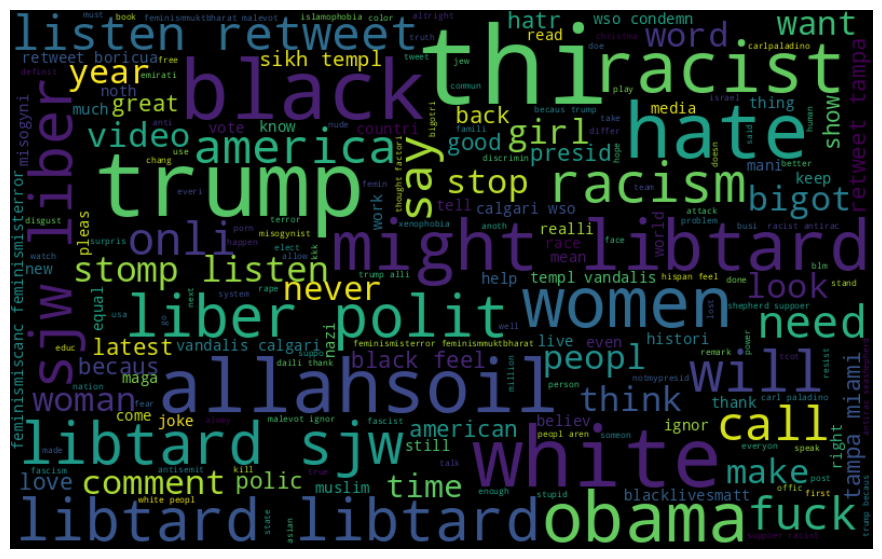

In [130]:
#visualization for negative words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extracting

In [131]:
#extracting the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [132]:
#extract hashtags from normal tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#extract hashtags from racist/improper tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [133]:
ht_positive[:10]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 []]

In [134]:
#combine them into a single list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_positive[:10]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate']

In [135]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


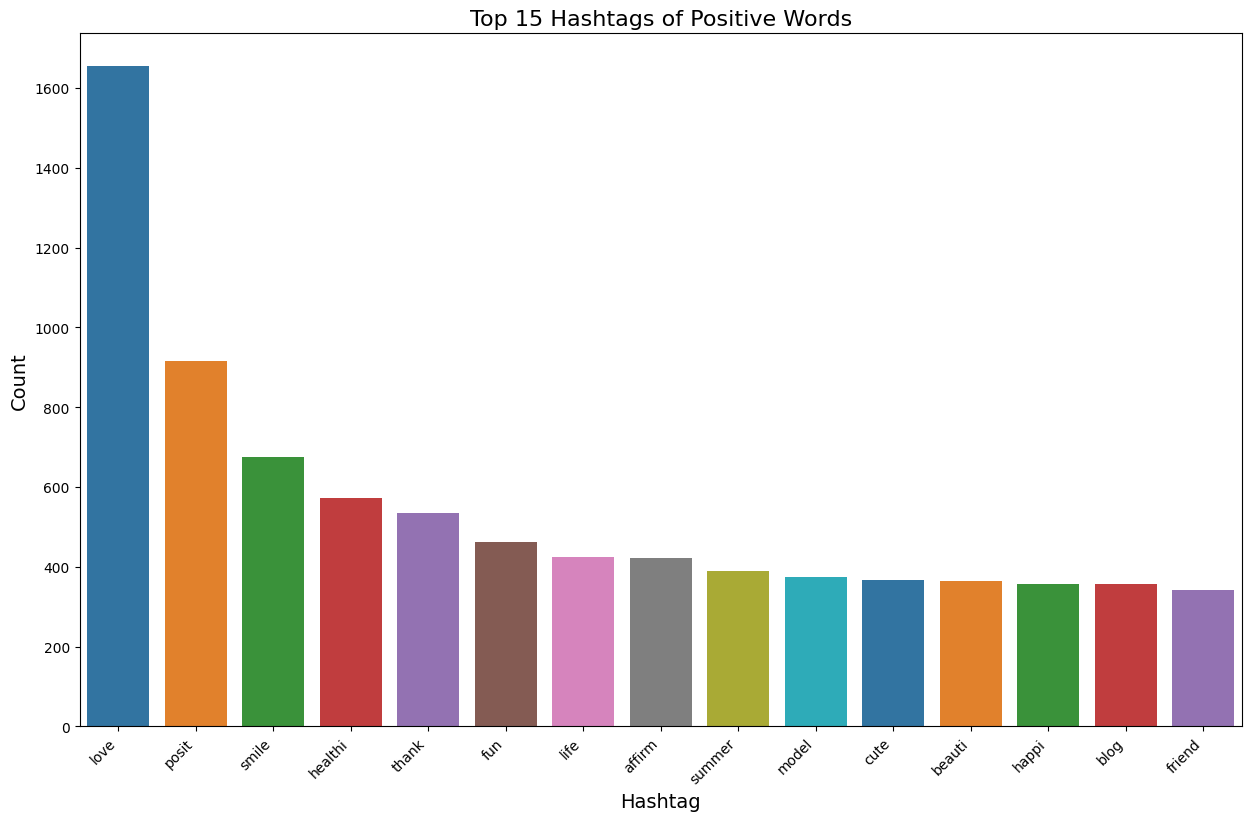

In [136]:
d = d.nlargest(columns='Count', n=15)
colors = sns.color_palette('tab10')[:len(d)]
plt.figure(figsize=(15, 9))
sns.barplot(data=d, x='Hashtag', y='Count', palette=colors)
plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 15 Hashtags of Positive Words', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

In [137]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [138]:
#Unique hashtags and their corresponding count value (-ve words)
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


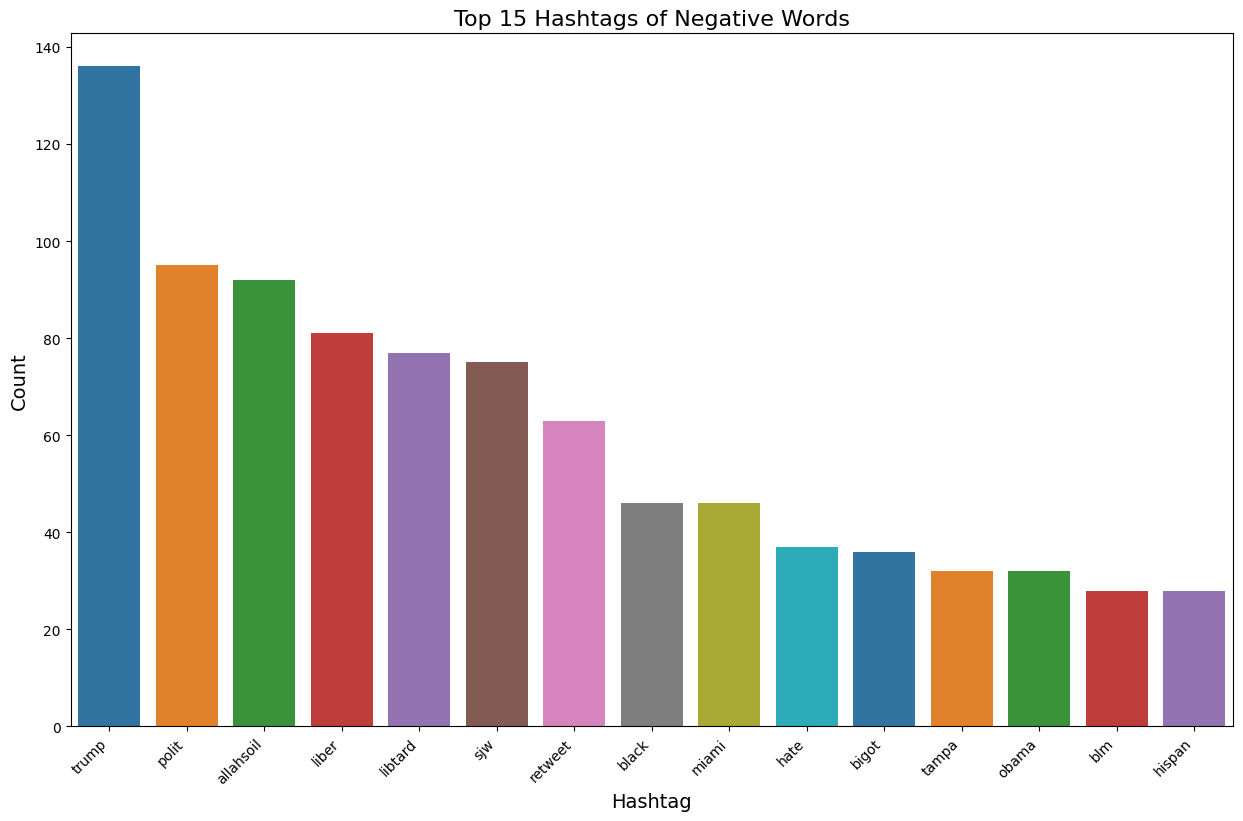

In [139]:
d = d.nlargest(columns='Count', n=15)

colors = sns.color_palette('tab10')[:len(d)]
plt.figure(figsize=(15, 9))
sns.barplot(data=d, x='Hashtag', y='Count', palette=colors)

plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 15 Hashtags of Negative Words', fontsize=16)

plt.xticks(rotation=45, ha='right')
plt.show()

# Input Split

In [140]:
#feature extraction using sklearn and vectorizers to convert text into numerical matrices
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# Model Training

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [143]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [144]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.498220640569395

In [145]:
accuracy_score(y_test,pred)

0.9470654486297084

In [146]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)


0.5545722713864307

In [147]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Evaluation Metrics Calculation
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred_prob[:, 1])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9433112251282693
F1 Score: 0.5545722713864307
ROC AUC Score: 0.9139501666631363


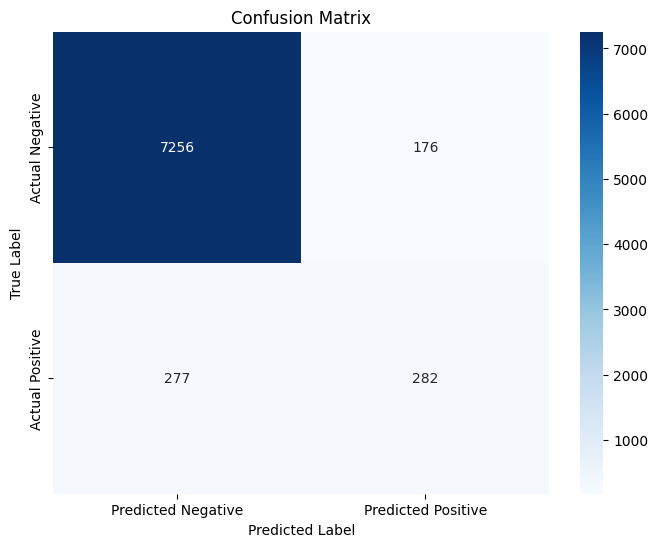

In [148]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [149]:
# Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7432
           1       0.62      0.50      0.55       559

    accuracy                           0.94      7991
   macro avg       0.79      0.74      0.76      7991
weighted avg       0.94      0.94      0.94      7991



In [150]:
pred_prob[0][1]

0.0010333444483627166

In [151]:
pred_prob[0][1] >= 0.3

False